In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/aman/.local/lib/python3.6/site-packages/IPython/core/interactiveshel

In [408]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


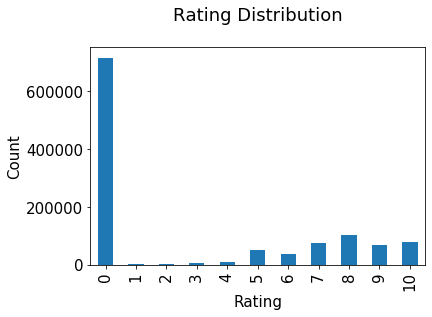

In [409]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [410]:
print(books.shape)
print(list(books.columns))


(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [411]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


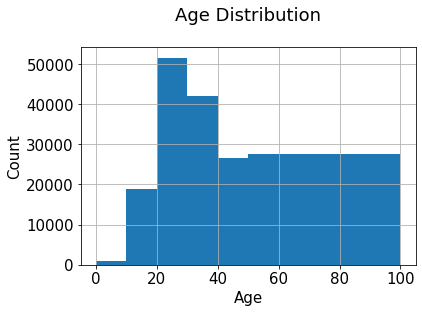

In [412]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [413]:
z=pd.DataFrame(ratings)
z=z.drop(columns=['userID'])
y=pd.merge(z, books , on='ISBN')
y.head()

,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [414]:
rating_count = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].count())
r=rating_count.sort_values('bookRating', ascending=False).head()
r

,bookRating
bookAuthor,
Stephen King,10053
Nora Roberts,8429
John Grisham,6010
James Patterson,5845
Mary Higgins Clark,4777


In [415]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,bookAuthor
0,Stephen King
1,Nora Roberts
2,John Grisham
3,James Patterson
4,Mary Higgins Clark


In [416]:
average_rating = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
bookAuthor,,
Stephen King,3.606287,10053
Nora Roberts,2.659390,8429
John Grisham,3.192013,6010
James Patterson,3.143713,5845
Mary Higgins Clark,2.634080,4777


In [417]:
most_rated_books_summary = pd.merge(a, books , on='bookAuthor')
most_rated_books_summary.head()

,bookAuthor,ISBN,bookTitle,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,Stephen King,0671042858,The Girl Who Loved Tom Gordon,2000,Pocket,http://images.amazon.com/images/P/0671042858.0...,http://images.amazon.com/images/P/0671042858.0...,http://images.amazon.com/images/P/0671042858.0...
1,Stephen King,0451162072,Pet Sematary,1994,Signet Book,http://images.amazon.com/images/P/0451162072.0...,http://images.amazon.com/images/P/0451162072.0...,http://images.amazon.com/images/P/0451162072.0...
2,Stephen King,8484509141,Mientras Escribo,2002,Distribooks,http://images.amazon.com/images/P/8484509141.0...,http://images.amazon.com/images/P/8484509141.0...,http://images.amazon.com/images/P/8484509141.0...
3,Stephen King,0743424425,The Shining,2001,Pocket,http://images.amazon.com/images/P/0743424425.0...,http://images.amazon.com/images/P/0743424425.0...,http://images.amazon.com/images/P/0743424425.0...
4,Stephen King,0743211383,Dreamcatcher,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...


In [418]:
rating_count = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].count())
#rating_count.sort_values('bookRating', ascending=False).head()
r=rating_count.sort_values('bookRating', ascending=False)
r=r.head()
r

,bookRating
yearOfPublication,
2002,87276
2001,75309
1999,70208
2003,69219
2000,67578


In [419]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,yearOfPublication
0,2002
1,2001
2,1999
3,2003
4,2000


In [420]:
average_rating = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
yearOfPublication,,
2002,3.156217,87276
2001,3.072700,75309
1999,2.920736,70208
2003,3.123261,69219
2000,2.945234,67578


In [421]:
most_rated_books_summary = pd.merge(a, books , on='yearOfPublication')
most_rated_books_summary

,yearOfPublication,ISBN,bookTitle,bookAuthor,publisher,imageUrlS,imageUrlM,imageUrlL
0,2002,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2002,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
2,2002,3404921038,Wie Barney es sieht.,Mordecai Richler,LÃ?Â¼bbe,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...
3,2002,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,Ballantine Books,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...
4,2002,0425182908,Isle of Dogs,Patricia Cornwell,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...
5,2002,042518630X,Purity in Death,J.D. Robb,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...
6,2002,0964778319,An Atmosphere of Eternity: Stories of India,David Iglehart,Sunflower Press,http://images.amazon.com/images/P/0964778319.0...,http://images.amazon.com/images/P/0964778319.0...,http://images.amazon.com/images/P/0964778319.0...
7,2002,2070423204,Lieux dits,Michel Tournier,Gallimard,http://images.amazon.com/images/P/2070423204.0...,http://images.amazon.com/images/P/2070423204.0...,http://images.amazon.com/images/P/2070423204.0...
8,2002,0743403843,Decipher,Stel Pavlou,Simon &amp; Schuster (Trade Division),http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...
9,2002,0316748641,Pasquale's Nose: Idle Days in an Italian Town,Michael Rips,Back Bay Books,http://images.amazon.com/images/P/0316748641.0...,http://images.amazon.com/images/P/0316748641.0...,http://images.amazon.com/images/P/0316748641.0...


In [422]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
r=rating_count.sort_values('bookRating', ascending=False).head()
r


,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [423]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [424]:
most_rated_books_summary = pd.merge(a, books , on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [425]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [22]:
with open("search.csv", 'a') as csvfile: 
    fields = ['userID','bookTitle', 'ISBN'] 
    writer = csv.DictWriter(csvfile, fieldnames = fields)
    writer.writeheader()

In [23]:
num=input("enter user id")
bum=input("enter book")

enter user id758833
enter bookClara Callan


In [24]:
fum=books.drop(columns = ['bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'])
fum.columns = ['ISBN', 'bookTitle']
fum.bookTitle=fum.bookTitle.astype(object)
fum.ISBN=fum.ISBN.astype(object)
fu=fum[fum.bookTitle=='Clara Callan']
fu=fu.drop(columns=['bookTitle'])
fu=fu.to_numpy()
fu=fu[0,0]
fu


'0002005018'

In [25]:
bum='Clara Callan'
fields = ['userID','bookTitle', 'ISBN'] 
mydict = [{'userID':num,'bookTitle':bum, 'ISBN':fu}]
with open("search.csv", 'a') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = fields)
    #writer.writeheader() 
    writer.writerows(mydict)

In [36]:
cooks=pd.read_csv("search.csv",header=0)
#cooks=pd.read_csv('search.csv', sep=';', error_bad_lines=False, encoding="latin-1")
print(list(cooks.columns))
cooks



['userID', 'bookTitle', 'ISBN']


,userID,bookTitle,ISBN
0,758833,Clara Callan,2005018


In [37]:
num=758833
cooks.bookTitle=cooks.bookTitle.astype(object)
cooks.ISBN=cooks.astype(object)
cooks.userID=cooks.userID.astype(object)

#cooks.columns=['userID','bookTitle','ISBN']
cu=cooks[cooks.userID==num]
cu=cu.drop(columns=['bookTitle','ISBN'])
cu=cu.to_numpy()
cu=cu[0,0]
#print(cu.shape())
#cu.head()
cu

758833

In [38]:

loca=users.drop(columns = ['Age'])
loca.columns = ['userID', 'Loocation']
loca.serID=loca.userID.astype(object)
#loca.Location=loca.Location.astype(object)
loc=loca[loca.userID==num]
loc=loc.drop(columns=['userID'])
loc=loc.to_numpy()

loc=loc[0,0]
#loc.head()
loc

/home/aman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [432]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [433]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

MemoryError: 

In [434]:
bones_ratings = ratings_pivot[cu]
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
c=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)
c

NameError: name 'ratings_pivot' is not defined

In [435]:
b=r.drop(columns = ['personR','ratingCount'])
b=b.astype(object)
b.reset_index(inplace=True)
b.iloc[:,:]

KeyError: "['personR' 'ratingCount'] not found in axis"

In [436]:
#books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  #index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(b, books, on='ISBN')
corr_books

NameError: name 'b' is not defined

In [39]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [40]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [41]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [43]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalRatingCount, dtype: float64


In [44]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [53]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains('usa')]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [54]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [55]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for H Is for Homicide (Kinsey Millhone Mysteries (Paperback)):

1: G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback)), with distance of 0.5637101443294508:
2: I Is for Innocent, with distance of 0.5975444496516611:
3: E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback)), with distance of 0.60774897748225:
4: F Is for Fugitive (Kinsey Millhone Mysteries (Paperback)), with distance of 0.6512111601672121:
5: C Is for Corpse (Kinsey Millhone Mysteries (Paperback)), with distance of 0.656041675880916:


In [56]:
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot2.head()

MemoryError: 

In [50]:
us_canada_user_rating_pivot2.shape

NameError: name 'us_canada_user_rating_pivot2' is not defined

In [51]:
X = us_canada_user_rating_pivot2.values.T
X.shape

NameError: name 'us_canada_user_rating_pivot2' is not defined

In [52]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

NameError: name 'X' is not defined

In [ ]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

In [ ]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Winter Solstice")
print(coffey_hands)

In [ ]:
corr_coffey_hands  = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands>0.85)])